In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
# Descargar recursos de NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Función de preprocesamiento
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    return ' '.join(tokens)  # Devolver el texto tokenizado como una cadena

In [4]:
# Datos de ejemplo
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative")
]

In [5]:
# Preparar datos
texts, labels = zip(*data)
texts = [preprocess(text) for text in texts]

In [6]:
# Convertir texto a características numéricas
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = np.array(labels)

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Definir y entrenar modelos
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


SVM Classification Report:
              precision    recall  f1-score   support

    positive       0.40      0.67      0.50         3
    negative       0.50      0.25      0.33         4

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7



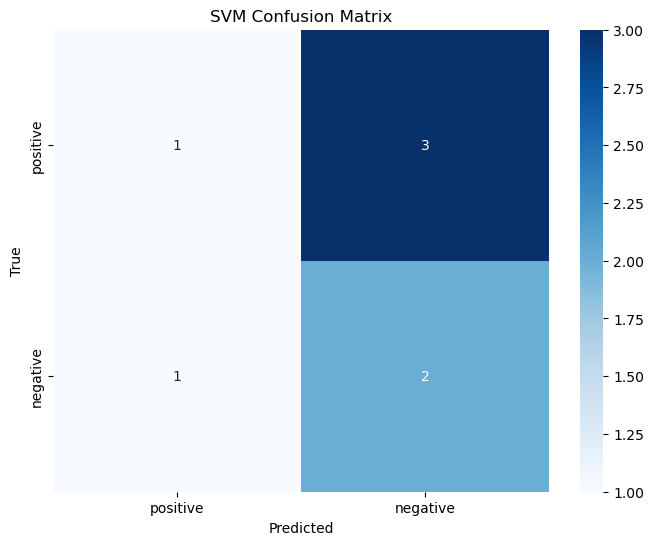

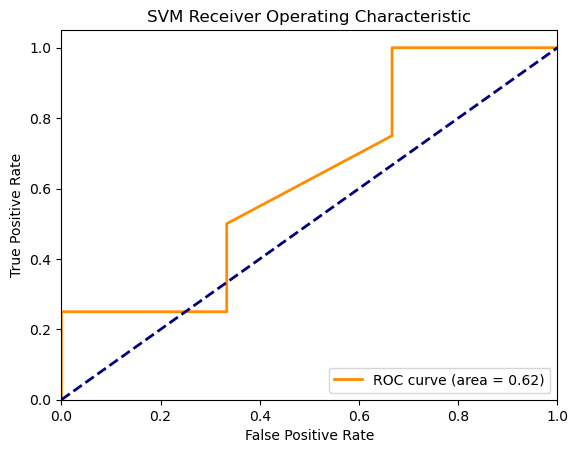

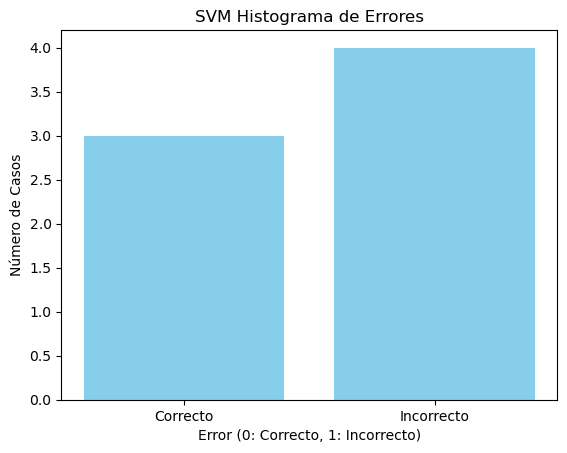


Decision Tree Classification Report:
              precision    recall  f1-score   support

    positive       0.40      0.67      0.50         3
    negative       0.50      0.25      0.33         4

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7



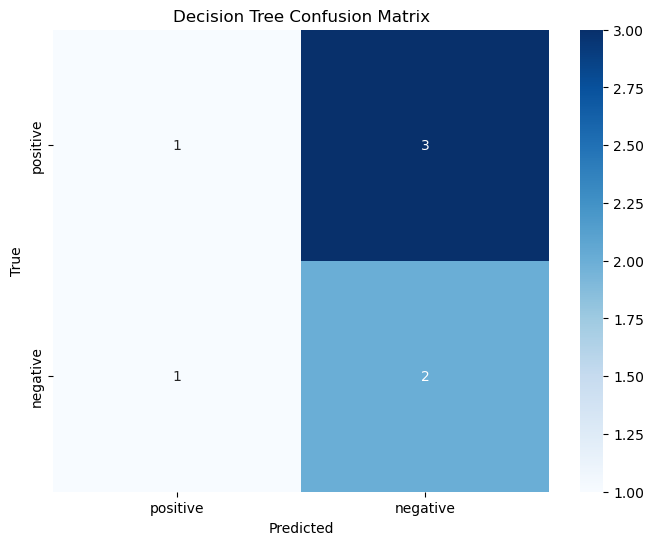

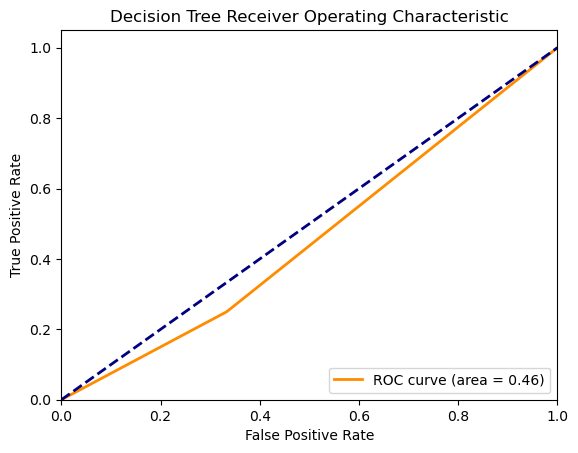

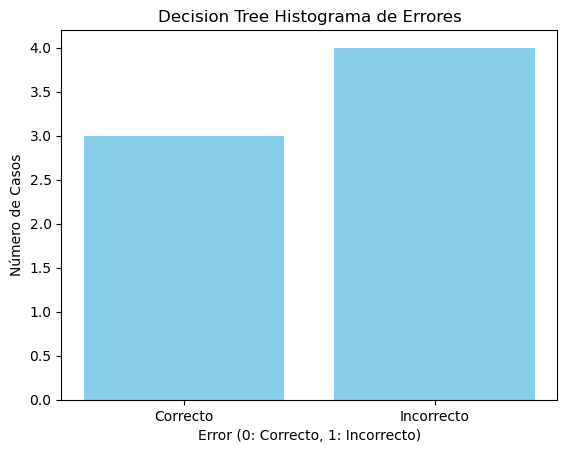


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    positive       0.50      0.33      0.40         3
    negative       0.60      0.75      0.67         4

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7



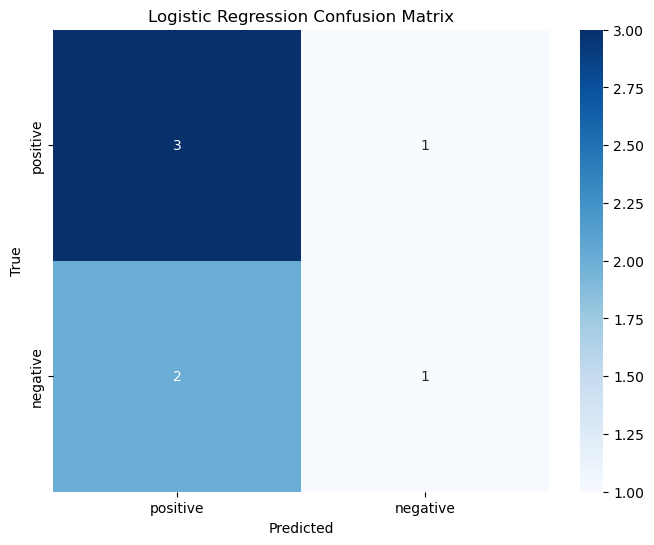

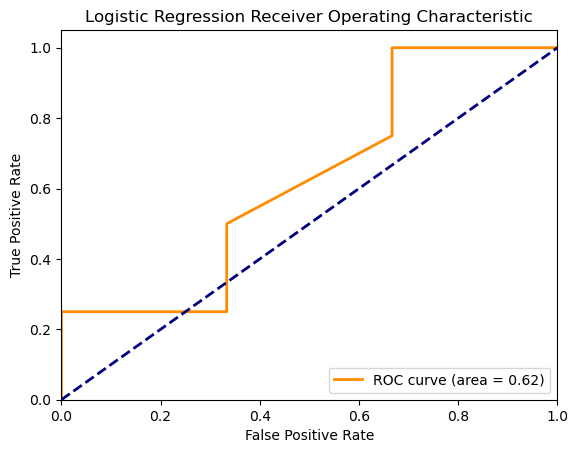

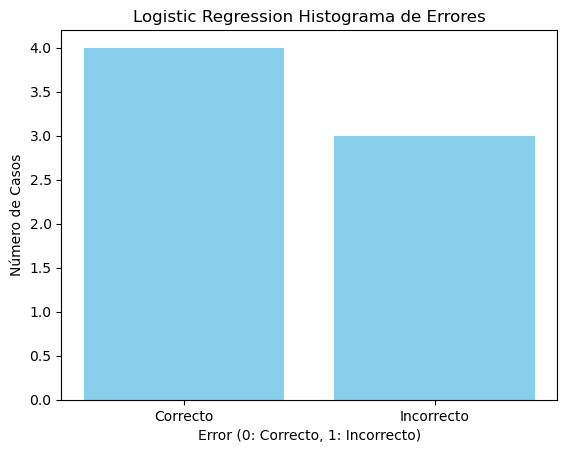

In [9]:
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Evaluar el modelo
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred, target_names=["positive", "negative"])
    cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
    
    # Calcular la curva ROC
    binary_labels = [1 if label == "positive" else 0 for label in y_test]
    binary_predictions = [1 if pred == "positive" else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(binary_labels, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Guardar los resultados
    results[model_name] = {
        'accuracy': accuracy,
        'report': report,
        'cm': cm,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr
    }

    # Imprimir resultados
    print(f"\n{model_name} Classification Report:")
    print(report)
    
    # Mostrar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Calcular y mostrar el histograma de errores
    errors = [1 if binary_labels[i] != binary_predictions[i] else 0 for i in range(len(binary_labels))]
    error_counts = Counter(errors)
    plt.figure()
    plt.bar(error_counts.keys(), error_counts.values(), color='skyblue')
    plt.xlabel('Error (0: Correcto, 1: Incorrecto)')
    plt.ylabel('Número de Casos')
    plt.title(f'{model_name} Histograma de Errores')
    plt.xticks([0, 1], ['Correcto', 'Incorrecto'])
    plt.show()

In [10]:
# Comparación final
print("Model Comparison Results:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"ROC AUC: {result['roc_auc']:.2f}")

Model Comparison Results:

SVM:
Accuracy: 0.43
ROC AUC: 0.62

Decision Tree:
Accuracy: 0.43
ROC AUC: 0.46

Logistic Regression:
Accuracy: 0.57
ROC AUC: 0.62
